<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Regress%C3%A3o%20Log%C3%ADstica/resolu%C3%A7%C3%A3o_exercicio_regress%C3%A3o_logistica_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício

Leia o dataset do `titanic.csv` como **df**

In [30]:
#seu código aqui
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("/content/titanic.csv")

In [32]:
df = df.dropna()

In [33]:
df.shape

(891, 12)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [35]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == "male" else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Train e Test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

importe a função que separa o dataframe entre treino e teste:

`from sklearn.model_selection import train_test_split`

In [36]:
#seu código aqui
from sklearn.model_selection import train_test_split

Agora execute a divisão do dataframe:

`train, test = train_test_split(df, train_size=0.8)`

In [37]:
train, test = train_test_split(df, train_size=0.8)


Você separou o dataset original em train e test. Na verdade, você escondeu parte dos dados para analisar os erros mais tarde.

# Primeiro Passo:

Você selecionará duas variáveis ​​para criar as variáveis ​​preditivas para o seu problema - armazene as colunas `Sexo` e a `Idade` em dataframes chamados `X_train` e `X_test`.

Também armazene a variável `Survived` em pandas series chamados `y_train` e `y_test`. Esta é a sua variável de destino.

In [38]:
X_train = train[['Gender', 'Age']]
X_test  = test[['Gender', 'Age']]

In [39]:
y_train = train['Survived']
y_test = test['Survived']

**Regressão Logistica para Classificação**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Use seu modelo de regressão logística para gerar uma previsão para seus dados de teste.

Crie uma variável chamada `y_pred` para colocar os resultados do modelo. Tente entender o que exatamente o método `.predict()` está fazendo.

In [40]:
#seu código aqui
from sklearn.linear_model import LogisticRegression

In [41]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test) 

# tá dizendo se o passageiro sobreviveu ou não de acordo com o modelo
# usando a divisão da probabilidade de sobreviver ou não de 50%

## Avaliando os resultados

Use o método do seu modelo chamado `score` para avaliar os resultados em seu conjunto de teste.

In [43]:
#seu código 
model.score(X_test,y_test)

0.8156424581005587

## Para pensar:

- O que o método `.score()` calcula?
- Essa métrica é apropriada para este caso de uso? Por quê?

In [44]:
# acurácia do modelo para a simulação de casos novos
# numero de observações que acertei dividido pelo número de observações total

In [45]:
y_test.value_counts(normalize=True) 

# 58% dos dados são 0 e 41% são 1
# dados desbalanceados

0.0    0.636872
1.0    0.363128
Name: Survived, dtype: float64

## Matriz de confusão

`Print` a matriz de confusão para os resultados obtidos.

In [46]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [47]:
confusion_matrix(y_test, model.predict(X_test))

array([[103,  11],
       [ 22,  43]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


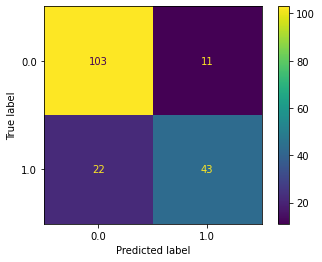

In [57]:
plot_confusion_matrix(model, X_test, y_test)

## Recall e Precisão

## Calcule a precisão e recall para o conjunto de teste.

_dica: use os métodos de sklearn.metrics_

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [49]:
from sklearn.metrics import recall_score,precision_score

In [58]:
recall_score(model.predict(X_test), y_test) 

# quantas vezes o modelo acerta considerando o label 0

# quantas vezes o modelo disse que o passageiro morreria e ele de fato morreu

0.7962962962962963

In [59]:
precision_score(model.predict(X_test), y_test)

# quantas vezes o modelo acerta considerando o label 1

# quantas vezes o modelo disse que o passageiro sobreviveria e ele de fato sobreviveu

0.6615384615384615

## Compare uma medida de acurácia, recall e precisão para conjuntos de treinamento e teste.

Você calculou as métricas para o conjunto de dados de teste. Agora, calcule as métricas para o conjunto de dados de treino e compare os resultados. 

O que você observa? Com base no que você vê, você acha que seu modelo está decorando os dados?

In [71]:
model.score(X_train,y_train)

0.7794943820224719

In [72]:
model.score(X_test,y_test) 

0.8156424581005587

In [73]:
recall_score(model.predict(X_test), y_test)

0.7962962962962963

In [74]:
recall_score(model.predict(X_train), y_train)

0.7307692307692307

In [75]:
precision_score(model.predict(X_train), y_train)

0.6859205776173285

In [76]:
precision_score(model.predict(X_test), y_test)

0.6615384615384615

In [ ]:
# considerando que as métricas relevantes estão maiores para o dataset de teste
# o modelo não deu overfit